In [14]:
import pandas as pd
import folium
import numpy as np
import matplotlib.pyplot as plt
# 2021-07-15일부터 2023-01-31일까지
file_path = './서울특별시_전동킥보드_견인_현황_20230131.csv' 
df = pd.read_csv(file_path, encoding = 'euc-kr')
# print(df)
# print(df.isnull().sum(axis=0))
df

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
88309,88310,2023-01-31,중구,서울특별시 중구 서소문동 37,오신고,2023-02-01
88310,88311,2023-01-31,동작구,서울특별시 동작구 노량진동 332,보도와 차도가 구분된 도로의 차도,2023-01-31
88311,88312,2023-01-31,동작구,서울특별시 동작구 대방동 415-40,기타,2023-02-01
88312,88313,2023-01-31,동작구,서울특별시 동작구 노량진동 329-16,기타,2023-02-01


In [15]:
print((df['유형'].isnull() | df['조치일'].isnull()).sum()) 

1


In [16]:
df = df.dropna(axis=0)
print(df)
print(df.isnull().sum(axis=0)) #누락데이터 제거

          번호         신고일   구정보                      주소                  유형  \
0          1  2021-07-15  영등포구   서울특별시 영등포구 여의도동 84-10  보도와 차도가 구분된 도로의 차도   
1          2  2021-07-15  영등포구  서울특별시 영등포구 영등포동1가 97-4               보도 중앙   
2          3  2021-07-15   동작구    서울특별시 동작구 노량진동 231-2  보도와 차도가 구분된 도로의 차도   
3          4  2021-07-15   동작구     서울특별시 동작구 노량진동 54-3       버스정류장, 택시 승강장   
4          5  2021-07-15   동작구   서울특별시 동작구 신대방동 460-30  보도와 차도가 구분된 도로의 차도   
...      ...         ...   ...                     ...                 ...   
88309  88310  2023-01-31    중구        서울특별시 중구 서소문동 37                 오신고   
88310  88311  2023-01-31   동작구      서울특별시 동작구 노량진동 332  보도와 차도가 구분된 도로의 차도   
88311  88312  2023-01-31   동작구    서울특별시 동작구 대방동 415-40                  기타   
88312  88313  2023-01-31   동작구   서울특별시 동작구 노량진동 329-16                  기타   
88313  88314  2023-01-31   동작구  서울특별시 동작구 노량진동 225-102                  기타   

              조치일  
0      2021-07-15  
1      2021-07-15  
2  

In [17]:
TOWING_TYPE = df['유형'].value_counts().sort_index()
print(TOWING_TYPE)

건물, 상가 보행자 진출입          277
계단, 난간                    7
기타                     2997
버스정류장, 택시 승강장          8783
보도 중앙                  5568
보도와 차도가 구분된 도로의 차도    44964
소방시설 5m 이내 구역            41
오신고                     142
육교위, 지하보차도 안             10
자전거 도로                 5446
점자블록, 엘리베이터 입구         4758
지하철역 진출입로 및 주변         3721
턱을 낮춘 진출입로               24
통행제한 구간                   8
횡단보도, 산책로 등           11567
Name: 유형, dtype: int64


In [275]:
# df = df[df['유형'] != "기타"]
df = df[df['유형'] != "오신고"] #오신고랑 기타 제거

TOWING_TYPE = df['유형'].value_counts()
print(TOWING_TYPE)

TOWING_TYPE_pie = df['유형'].value_counts().head(9)

보도와 차도가 구분된 도로의 차도    44964
횡단보도, 산책로 등           11567
버스정류장, 택시 승강장          8783
보도 중앙                  5568
자전거 도로                 5446
점자블록, 엘리베이터 입구         4758
지하철역 진출입로 및 주변         3721
기타                     2997
건물, 상가 보행자 진출입          277
소방시설 5m 이내 구역            41
턱을 낮춘 진출입로               24
육교위, 지하보차도 안             10
통행제한 구간                   8
계단, 난간                    7
Name: 유형, dtype: int64


In [274]:
TOWING_TYPE = dict(df['유형'].value_counts())
print(TOWING_TYPE)

{'보도와 차도가 구분된 도로의 차도': 44964, '횡단보도, 산책로 등': 11567, '버스정류장, 택시 승강장': 8783, '보도 중앙': 5568, '자전거 도로': 5446, '점자블록, 엘리베이터 입구': 4758, '지하철역 진출입로 및 주변': 3721, '기타': 2997, '건물, 상가 보행자 진출입': 277, '소방시설 5m 이내 구역': 41, '턱을 낮춘 진출입로': 24, '육교위, 지하보차도 안': 10, '통행제한 구간': 8, '계단, 난간': 7}


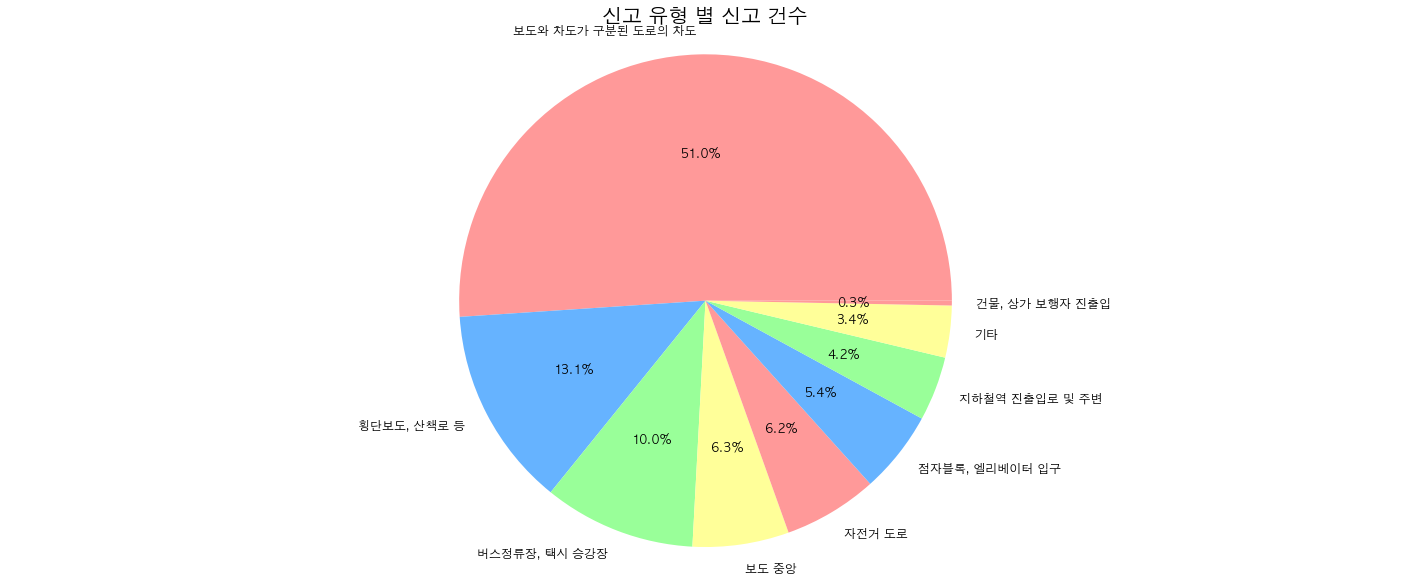

In [280]:
# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
# font_path = "./malgun.ttf"   #폰트파일의 위치
# font_name = font_manager.FontProperties(fname=font_path).get_name()
font_name = 'AppleGothic'
plt.rc('font', family=font_name)
# print(plt.rcParams['font.family'])
# plt.figure(figsize=(30,10))
# plt.title('신고 유형 별 신고 건수')
# plt.xticks(rotation=90)
# plt.bar(TOWING_TYPE.keys(), TOWING_TYPE.values())  #파이차트로 바꾸기

TOWING_TYPE_pie = dict(TOWING_TYPE_pie)

plt.figure(figsize=(25, 10))
plt.title('신고 유형 별 신고 건수', fontsize=20)
plt.pie(TOWING_TYPE_pie.values(), labels=TOWING_TYPE_pie.keys(), autopct='%1.1f%%', textprops={'fontsize': 12}, colors=['#FF9999', '#66B3FF', '#99FF99', '#FFFF99'])  # Specify desired colors
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [23]:
df

,번호,신고일,구정보,주소,유형,조치일
0,1,2021-07-15,영등포구,서울특별시 영등포구 여의도동 84-10,보도와 차도가 구분된 도로의 차도,2021-07-15
1,2,2021-07-15,영등포구,서울특별시 영등포구 영등포동1가 97-4,보도 중앙,2021-07-15
2,3,2021-07-15,동작구,서울특별시 동작구 노량진동 231-2,보도와 차도가 구분된 도로의 차도,2021-07-15
3,4,2021-07-15,동작구,서울특별시 동작구 노량진동 54-3,"버스정류장, 택시 승강장",2021-07-15
4,5,2021-07-15,동작구,서울특별시 동작구 신대방동 460-30,보도와 차도가 구분된 도로의 차도,2021-07-15
...,...,...,...,...,...,...
88308,88309,2023-01-31,관악구,서울특별시 관악구 봉천동 산57-3,보도와 차도가 구분된 도로의 차도,2023-01-31
88310,88311,2023-01-31,동작구,서울특별시 동작구 노량진동 332,보도와 차도가 구분된 도로의 차도,2023-01-31
88311,88312,2023-01-31,동작구,서울특별시 동작구 대방동 415-40,기타,2023-02-01
88312,88313,2023-01-31,동작구,서울특별시 동작구 노량진동 329-16,기타,2023-02-01


In [24]:
REGISTER_DATE = df['신고일'].value_counts()
print(REGISTER_DATE)

# print(df.loc[df['신고일']=='2022-09-13'])

2022-03-10    443
2022-09-13    438
2022-03-17    414
2022-06-07    412
2022-03-15    401
             ... 
2022-06-30     72
2021-08-27     68
2022-11-24     51
2022-11-25     51
2021-07-15     35
Name: 신고일, Length: 383, dtype: int64


In [25]:
ACTION_DATE = df['조치일'].value_counts()
print(ACTION_DATE)

# print(df.loc[df['신고일']=='2022-09-13'])

2022-03-10    443
2022-09-13    433
2022-03-17    413
2022-06-07    410
2022-02-15    401
             ... 
2022-11-25     52
2022-11-24     49
2021-07-15     32
2023-02-01      3
2022-05-01      1
Name: 조치일, Length: 385, dtype: int64


In [63]:
GU = df['구정보'].value_counts().sort_index()
print(GU)

강남구     6802
강동구     2779
강북구     1178
강서구     3604
관악구     4455
광진구     2959
구로구     1418
금천구        2
노원구     2034
도봉구     2034
동대문구    3662
동작구     5044
마포구     9642
서대문구    2024
서초구     5626
성동구     7356
성북구     1065
송파구     8948
양천구     1306
영등포구    7345
용산구     3133
은평구      387
종로구     1383
중구      1394
중랑구     2591
Name: 구정보, dtype: int64


In [67]:
# GU = df['구정보'].value_counts().sort_index()
GU = df['구정보'].value_counts()
print(GU)

GUDict= dict(GU)

NdstDict = dict(sorted(GUDict.items()))
print(NdstDict)

마포구     9642
송파구     8948
성동구     7356
영등포구    7345
강남구     6802
서초구     5626
동작구     5044
관악구     4455
동대문구    3662
강서구     3604
용산구     3133
광진구     2959
강동구     2779
중랑구     2591
노원구     2034
도봉구     2034
서대문구    2024
구로구     1418
중구      1394
종로구     1383
양천구     1306
강북구     1178
성북구     1065
은평구      387
금천구        2
Name: 구정보, dtype: int64
{'강남구': 6802, '강동구': 2779, '강북구': 1178, '강서구': 3604, '관악구': 4455, '광진구': 2959, '구로구': 1418, '금천구': 2, '노원구': 2034, '도봉구': 2034, '동대문구': 3662, '동작구': 5044, '마포구': 9642, '서대문구': 2024, '서초구': 5626, '성동구': 7356, '성북구': 1065, '송파구': 8948, '양천구': 1306, '영등포구': 7345, '용산구': 3133, '은평구': 387, '종로구': 1383, '중구': 1394, '중랑구': 2591}


<BarContainer object of 25 artists>

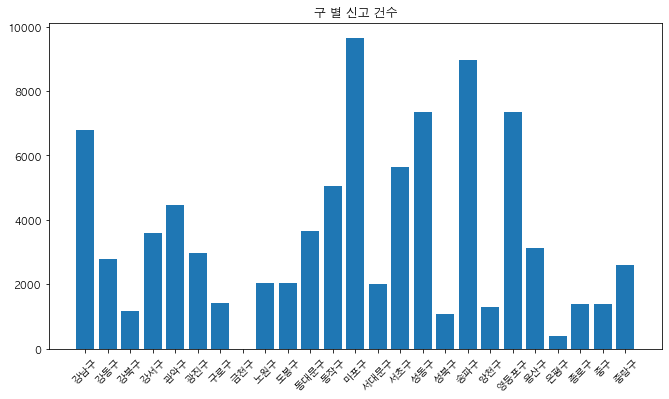

In [70]:
GUKey=NdstDict.keys()
vals = NdstDict.values()
# plt.rc('font', family='Malgun Gothic') # For Windows
font_name = 'AppleGothic'
plt.rc('font', family=font_name)
# print(plt.rcParams['font.family'])
plt.figure(figsize=(11,6))
plt.title('구 별 신고 건수')
plt.xticks(rotation=45)
plt.bar(GUKey, vals)


In [71]:
file_path_ = './서울시 대학 및 전문대학 DB 정보 (한국어).csv'
dfu = pd.read_csv(file_path_, encoding = 'euc-kr')

dfu = dfu[['학교명','주소','행정시','행정구']]
dfu

,학교명,주소,행정시,행정구
0,서울시립대학교,서울 동대문구 서울시립대로 163 (전농동 90번지),서울특별시,동대문구
1,서울여자간호대학교,서울 서대문구 홍제3동 서울여자간호대학,서울특별시,서대문구
2,서울여자대학교,서울특별시 노원구 화랑로 621 서울여자대학교,서울특별시,노원구
3,서일대학교,서울 중랑구 서일대학길 22(면목동 49-3) 서일대학교,서울특별시,중랑구
4,성공회대학교,서울 구로구 항동 성공회대학교,서울특별시,구로구
...,...,...,...,...
59,서울교육대학교,서울 서초구 서초중앙로 96(서초동 1650),서울특별시,서초구
60,서울기독대학교,서울 은평구 갈현로 4길 26-2호,서울특별시,은평구
61,서울대학교,서울 관악구 관악로 1 서울대학교,서울특별시,관악구
62,서울디지털대학교,서울 마포구 도화동 560번지,서울특별시,마포구


In [174]:
univDict = {}
for k in area['자치구별(2)']:
    univDict[k] = 0
    
for i in range(64):
    univDict[dfu.iloc[i][3]] += 1 # 대학이 위치한 행정 구 1개 당 +1
univDict = dict(sorted(univDict.items(), key=lambda x: x[1], reverse=True))
univDict

{'서대문구': 9,
 '성북구': 7,
 '노원구': 7,
 '종로구': 6,
 '동대문구': 5,
 '광진구': 3,
 '마포구': 3,
 '구로구': 3,
 '동작구': 3,
 '서초구': 3,
 '중구': 2,
 '용산구': 2,
 '성동구': 2,
 '강서구': 2,
 '중랑구': 1,
 '강북구': 1,
 '도봉구': 1,
 '은평구': 1,
 '관악구': 1,
 '강남구': 1,
 '송파구': 1,
 '양천구': 0,
 '금천구': 0,
 '영등포구': 0,
 '강동구': 0}

In [233]:
univPopulation = pd.read_excel('자치구별+대학교+학령인구(추계인구)_20230519222042.xlsx')
univPopulation.iloc[2:]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,자치구별(1),자치구별(2),2022,2023
2,합계,노원구,25166,22771
3,합계,송파구,24233,22588
4,합계,강남구,21726,21052
5,합계,성북구,22666,19125
6,합계,양천구,18926,18348
7,합계,강서구,19458,18299
8,합계,은평구,17779,16697
9,합계,관악구,18593,16263
10,합계,강동구,16261,15259
11,합계,서초구,16178,15230


In [230]:
univPopulation = univPopulation[['자치구별(2)', '2022']].iloc[2:]
univPopulation.columns = ['구', '22년_인구']
univPopulation.reset_index(drop=True)

,구,22년_인구
0,노원구,25166
1,송파구,24233
2,강남구,21726
3,성북구,22666
4,양천구,18926
5,강서구,19458
6,은평구,17779
7,관악구,18593
8,강동구,16261
9,서초구,16178


In [200]:
popDict = {}
for k, v in zip(univPopulation['구'], univPopulation['22년_인구']):
    popDict[k] = v

popDict

{'노원구': 25166,
 '송파구': 24233,
 '강남구': 21726,
 '성북구': 22666,
 '양천구': 18926,
 '강서구': 19458,
 '은평구': 17779,
 '관악구': 18593,
 '강동구': 16261,
 '서초구': 16178,
 '동작구': 15983,
 '동대문구': 15957,
 '구로구': 13764,
 '마포구': 14301,
 '서대문구': 14470,
 '광진구': 14129,
 '중랑구': 12903,
 '도봉구': 11832,
 '영등포구': 11704,
 '강북구': 10988,
 '성동구': 11167,
 '용산구': 7761,
 '금천구': 7269,
 '종로구': 7602,
 '중구': 4723}

In [202]:
file_path2 = './서울시 전동킥보드 주차구역 현황.csv' #영등포구가 없다....!!!!!!
dfp = pd.read_csv(file_path2, encoding = 'euc-kr')

#중복제거
dfp = dfp.drop_duplicates()
print(dfp)

GUP = dfp['시군구명'].value_counts().sort_index()
GUP.loc['영등포구'] = 0
print(GUP)

GUPDict = dict(sorted(GUP.items()))
print(GUPDict)

      순번 시군구명          주소                           상세위치 거치대 유무  거치대 크기
0      1  종로구  팔판동 115-63                 청와대 춘추문 맞은편 인근      Y     6.0
1      2  종로구   연건동 218-1                   KT광화문 혜화지사 앞      Y     6.0
2      3  종로구   연건동 178-3                  홍익대학교 대학로 맞은편      Y     6.0
3      4  종로구    동승동 1-24                   대학로 마로니에공원 앞      Y     8.0
4      5  종로구    와룡동 75-4                        연악사 맞은편      Y     8.0
..   ...  ...         ...                            ...    ...     ...
188  188  강동구    명일동 46-5                   고덕역 4번 출구 인근      N     NaN
189  189  강동구   명일동 303-1                   명일역 2번 출구 인근      N     NaN
190  190  강동구     암사동 524                       선사고등학교 앞      Y     8.0
191  191  강동구   강일동 679-6        강동공영차고지 버스정류장(25101) 인근      Y     6.0
192  192  강동구     강일동 681  강일리버파크3단지308동 버스정류장(25521) 인근      Y     6.0

[192 rows x 6 columns]
강남구     10
강동구      5
강북구      9
강서구     22
관악구      6
광진구      1
구로구      2
금천구      5
노원구      4
도봉구      4
동대

In [73]:
dfp

,순번,시군구명,주소,상세위치,거치대 유무,거치대 크기
0,1,종로구,팔판동 115-63,청와대 춘추문 맞은편 인근,Y,6.0
1,2,종로구,연건동 218-1,KT광화문 혜화지사 앞,Y,6.0
2,3,종로구,연건동 178-3,홍익대학교 대학로 맞은편,Y,6.0
3,4,종로구,동승동 1-24,대학로 마로니에공원 앞,Y,8.0
4,5,종로구,와룡동 75-4,연악사 맞은편,Y,8.0
...,...,...,...,...,...,...
188,188,강동구,명일동 46-5,고덕역 4번 출구 인근,N,NaN
189,189,강동구,명일동 303-1,명일역 2번 출구 인근,N,NaN
190,190,강동구,암사동 524,선사고등학교 앞,Y,8.0
191,191,강동구,강일동 679-6,강동공영차고지 버스정류장(25101) 인근,Y,6.0


In [146]:
df_combined = pd.concat([GU, GUP], axis=1)

df_combined.columns = ['불법주차', '주차구역']

df_combined['주차구역'] = df_combined['주차구역'].fillna(0).astype(int)

#비율 
# df_combined['Ratio'] = df_combined['불법주차'] / df_combined['주차구역']

# df_combined['Ratio'] = df_combined['Ratio'].round(1)

df_combined

,불법주차,주차구역
마포구,9642,10
송파구,8948,7
성동구,7356,1
영등포구,7345,0
강남구,6802,10
서초구,5626,50
동작구,5044,4
관악구,4455,6
동대문구,3662,15
강서구,3604,22


구별 불법 주차 지도 입지 이거 시각화 필요 -> 중간 발표에는 있어야한다!

In [236]:
file_path3 = './행정구역_20230513133737.csv'
seouldf = pd.read_csv(file_path3, encoding = 'utf-8')
seouldf.iloc[1:]

,자치구별(1),자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5
1,자치구별(1),자치구별(2),면적 (km²),구성비 (%),행정 (개),법정 (개),소계,소계
2,서울시,소계,605.24,100.00,426,466,12859,96471
3,서울시,종로구,23.91,3.95,17,87,279,1475
4,서울시,중구,9.96,1.65,15,74,253,1580
5,서울시,용산구,21.87,3.61,16,36,356,2597
6,서울시,성동구,16.86,2.79,17,17,471,3645
7,서울시,광진구,17.06,2.82,15,7,370,3012
8,서울시,동대문구,14.22,2.35,14,10,360,2631
9,서울시,중랑구,18.50,3.06,16,6,558,4241
10,서울시,성북구,24.58,4.06,20,39,468,3671


In [237]:
area = seouldf[['자치구별(2)', '2021']]
area = area.iloc[3:]
area.set_index('자치구별(2)')
area['2021'].astype(float)
area = area.rename(columns={'2021': '면적'})
area

,자치구별(2),면적
3,종로구,23.91
4,중구,9.96
5,용산구,21.87
6,성동구,16.86
7,광진구,17.06
8,동대문구,14.22
9,중랑구,18.50
10,성북구,24.58
11,강북구,23.60
12,도봉구,20.65


In [168]:
areadict = {}
for k, v in zip(area['자치구별(2)'], area['2021']):
    areadict[k] = float(v)
areadict

{'종로구': 23.91,
 '중구': 9.96,
 '용산구': 21.87,
 '성동구': 16.86,
 '광진구': 17.06,
 '동대문구': 14.22,
 '중랑구': 18.5,
 '성북구': 24.58,
 '강북구': 23.6,
 '도봉구': 20.65,
 '노원구': 35.44,
 '은평구': 29.71,
 '서대문구': 17.63,
 '마포구': 23.85,
 '양천구': 17.41,
 '강서구': 41.45,
 '구로구': 20.12,
 '금천구': 13.02,
 '영등포구': 24.55,
 '동작구': 16.36,
 '관악구': 29.57,
 '서초구': 46.98,
 '강남구': 39.5,
 '송파구': 33.88,
 '강동구': 24.59}

In [128]:
ingu = pd.read_csv('주민등록인구.csv')
ingu = ingu[['동별(2)', '2023 1/4']]
ingu = ingu.iloc[2:]
ingu = ingu.reset_index(drop=True)
ingu.columns = ['구', '인구']
ingu = ingu.astype({'인구': int})
ingu

,구,인구
0,송파구,663704
1,강서구,573711
2,강남구,537817
3,노원구,506989
4,관악구,502628
5,은평구,468766
6,강동구,464027
7,양천구,442345
8,성북구,441855
9,구로구,417983


In [129]:
inguDict = {}
for k, v in zip(ingu['구'], ingu['인구']):
    inguDict[k] = v

In [130]:
dense = pd.read_excel('인구밀도.xlsx')
dense = dense.iloc[1:]
dense = dense[['동별(2)', '2022.2']]
dense.columns = ['구', '인구밀도']
dense

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구,인구밀도
1,강남구,13522
2,강동구,18871
3,강북구,12614
4,강서구,13863
5,관악구,16950
6,광진구,20589
7,구로구,20796
8,금천구,18650
9,노원구,14334
10,도봉구,15205


In [225]:
merged_df = pd.merge(ingu, dense)
merged_df = pd.merge(merged_df,univPopulation)
merged_df = merged_df.rename(columns={'구': '구', '인구': '구별 인구', '인구밀도': '구별 인구밀도', '22년_인구': '구별 대학생인구'})
merged_df

,구,구별 인구,구별 인구밀도,구별 대학생인구
0,송파구,663704,19614,24233
1,강서구,573711,13863,19458
2,강남구,537817,13522,21726
3,노원구,506989,14334,25166
4,관악구,502628,16950,18593
5,은평구,468766,15840,17779
6,강동구,464027,18871,16261
7,양천구,442345,25503,18926
8,성북구,441855,17981,22666
9,구로구,417983,20796,13764


In [167]:
# df_combined = pd.concat([GU, GUP, ingu, dense], axis=1)

# df_combined.columns = ['불법주차', '주차구역', '인구', '인구밀도', ]

# df_combined['주차구역'] = df_combined['주차구역'].fillna(0).astype(int)
# df_combined['인구밀도'] = df_combined['인구밀도'].fillna(0).astype(int)

In [ ]:
'''
-----<<데이터 설명>>-----
GUDict      # 구 별 신고 건 수
GUPDict      # 구별 주차구역 수
areaDict     # 구 별 면적
singoPerArea # 구 별 면적 당 신고 건 수
univDict     # 구 별 대학 수 (분교 포함)
popDict      # 구 별 대학생 수 (학교 재학생 수 기준인지, 거주지 기준인지..?)
inguDict     # 구 별 인구 수
ratio        # 구 별 인구 당 신고 건 수 (type = list)
denseDict    # 구 별 인구밀도
'''

In [210]:
# -----<< 구 이름 순으로 데이터 정렬 >>-----
NdstDict = dict(sorted(GUDict.items()))
NGUPDict = dict(sorted(GUPDict.items()))
NareaDict = dict(sorted(areadict.items()))
# NsingoPerArea = dict(sorted(singoPerArea.items()))
NunivDict = dict(sorted(univDict.items()))
NpopDict = dict(sorted(popDict.items()))
NinguDict = dict(sorted(inguDict.items()))
NdenseDict = dict(sorted(denseDict.items()))

In [211]:
district = NdstDict.keys()
district

dict_keys(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])

In [282]:
relation = {
    '구':          district,
    '신고 수':      NdstDict.values(),
    '주차구역 수':   NGUPDict.values(),
    '면적':         NareaDict.values(),
    '대학 수':      NunivDict.values(),
    '대학생 수':    NpopDict.values(),
#     '인구 수': NinguDict.values(),
#     '인구밀도' :     NdenseDict.values(),
#     '신고 수/인구': ratio,
#     '신고 수/면적': NsingoPerArea.values(),
#     '집값' : NhouseDict.values()
    
    }
rdf = pd.DataFrame(relation) # 'R elation D ata F rame'
rdf

,구,신고 수,주차구역 수,면적,대학 수,대학생 수
0,강남구,6802,10,39.50,1,21726
1,강동구,2779,5,24.59,0,16261
2,강북구,1178,9,23.60,1,10988
3,강서구,3604,22,41.45,2,19458
4,관악구,4455,6,29.57,1,18593
5,광진구,2959,1,17.06,3,14129
6,구로구,1418,2,20.12,3,13764
7,금천구,2,5,13.02,0,7269
8,노원구,2034,4,35.44,7,25166
9,도봉구,2034,4,20.65,1,11832


In [283]:
rdf.corr()

,신고 수,주차구역 수,면적,대학 수,대학생 수
신고 수,1.000000,0.186122,0.331470,-0.174625,0.241713
주차구역 수,0.186122,1.000000,0.620123,0.078074,0.081849
면적,0.331470,0.620123,1.000000,-0.013367,0.606177
대학 수,-0.174625,0.078074,-0.013367,1.000000,0.179500
대학생 수,0.241713,0.081849,0.606177,0.179500,1.000000


<AxesSubplot:>

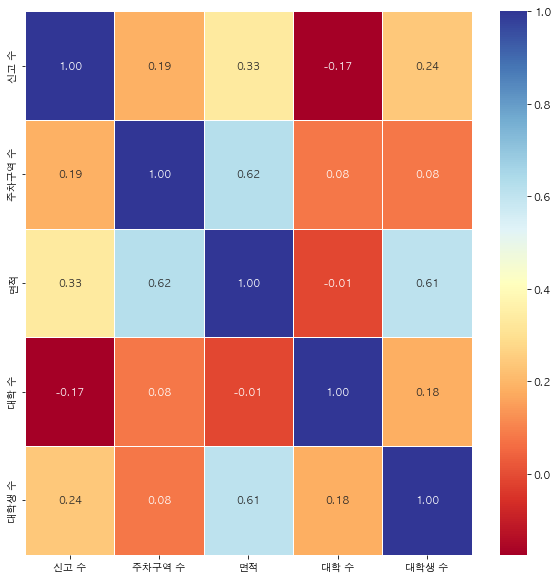

In [287]:
plt.figure(figsize=(10,10))
sns.heatmap(data = rdf.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlBu')

# 지도 만들기

In [263]:
import geopandas as gpd
gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding = 'euc-kr')

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11740,강동구,NaN,11740,125,"POLYGON ((971595.075 1952405.815, 971596.036 1..."
1,11710,송파구,NaN,11710,126,"POLYGON ((965821.957 1949386.153, 965816.737 1..."
2,11680,강남구,NaN,11680,127,"POLYGON ((959331.597 1948602.068, 959342.021 1..."
3,11650,서초구,NaN,11650,128,"POLYGON ((956982.039 1947144.037, 956982.518 1..."
4,11620,관악구,NaN,11620,129,"POLYGON ((949438.997 1944127.713, 949456.647 1..."
5,11590,동작구,NaN,11590,130,"POLYGON ((951811.770 1946444.671, 951885.519 1..."
6,11560,영등포구,NaN,11560,131,"POLYGON ((945280.001 1950949.319, 945361.246 1..."
7,11545,금천구,NaN,11545,132,"POLYGON ((944705.924 1943086.537, 944706.472 1..."
8,11530,구로구,NaN,11530,133,"POLYGON ((945165.294 1946679.190, 945362.702 1..."
9,11500,강서구,NaN,11500,134,"POLYGON ((939006.015 1955916.461, 939036.124 1..."


In [264]:
# -*- coding: utf-8 -*-
seoul_map = folium.Map(location=[37.55,126.98], zoom_start=12,tiles='cartodbpositron')

seoul_map.save('./seoul.html')

In [265]:
import geopandas as gpd
import folium
import seaborn as sns 
import requests
import json


# # 서울 행정구역 json raw파일(githubcontent)
# r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
# c = r.content
# seoul_geo = json.loads(c)

# data = gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding='euc-kr')

# school_data = pd.read_excel('./대학교좌표.xlsx')

# seoul_map.choropleth(geo_data=seoul_geo,
#              data=NdstDict,
#              fill_color='YlOrRd', # 색상 변경도 가능하다
#              fill_opacity=0.5,
#              line_opacity=0.2,
#              key_on='feature.properties.name',
#              legend_name="지역구별 신고 수"
#             )

# seoul_map.save('./seoul.html')
# seoul_map

In [266]:
import geopandas as gpd
import folium
import seaborn as sns 
import requests
import json


# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

data = gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding='euc-kr')

school_data = pd.read_excel('./대학교좌표.xlsx')

seoul_map.choropleth(geo_data=seoul_geo,
             data=NdstDict,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="지역구별 신고 수"
            )

for _, row in school_data.iterrows():
    folium.Marker(
        location=[row['Y-좌표'], row['X-좌표']],
        icon=folium.Icon(color='blue')
    ).add_to(seoul_map)

seoul_map.save('./seoul_univ.html')
seoul_map

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [267]:
import geopandas as gpd
import folium

parking_data = pd.read_excel('./주차구역좌표.xlsx')

data = gpd.read_file('./LARD_ADM_SECT_SGG_서울', encoding='euc-kr')

seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=12,tiles='cartodbpositron')

seoul_map.choropleth(geo_data=seoul_geo,
             data=NdstDict,
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='feature.properties.name',
             legend_name="지역구별 신고 수"
            )

# folium.GeoJson(data).add_to(seoul_map)
for _, row in parking_data.iterrows():
    folium.Marker(
        location=[row['Y-좌표'], row['X-좌표']],
        icon=folium.Icon(color='blue')
    ).add_to(seoul_map)

seoul_map.save('./seoul_parkingzone.html')
seoul_map

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


# 읽어보면 도움 될(?) 자료

In [126]:
'''
<참조 논문> https://koreascience.kr/article/JAKO202111037332933.pdf

이용 특성을 살펴보면 2020년 6월
기준 일평균 13,648회, 2,286대, 9,013인이 이용하며, 
기기당 약 6.0회/대, 인당 약 1.5회/인 이용하는 것으로 나타났다. 
평균 이용시간은 9.4분, 이용거리는 1.5km, 이동속도는 10.3km/h인 것으로 나타났다. 

공간적 분포를 살펴보면
지하철역, 대학교, 복합쇼핑몰 등 통행 유발시설이 위치한 지역에서 주로 이용되는 것으로 나타났다.

인구 및 사회경제지표를 살펴보면 
10~30대 인구가 많이 거주하고, 
40대 이상 인구가 적게 거주할수록, 
생활인구와 3차산업 사업체수가 많을수록 이용량이 증가하는 것으로 나타났다. 

지하철역 출구 수, 버스정류장 수 등이 많고 
근린생활시설, 업무시설, 교육시설 등의 연면적이 클수록 
이용수요가 많은 것으로 분석되었다. 

또한, 평균 기온이 높고, 맑은 날에 이용수요가 많은 것으로 분석되었다.

통근 통학 및 사적인 이유(약속 등)의 목적으로 많이 이용된다.
1.5Km 미만의 통행이 주 이용 비율이다.
'''

'\n<참조 논문> https://koreascience.kr/article/JAKO202111037332933.pdf\n\n이용 특성을 살펴보면 2020년 6월\n기준 일평균 13,648회, 2,286대, 9,013인이 이용하며, \n기기당 약 6.0회/대, 인당 약 1.5회/인 이용하는 것으로 나타났다. \n평균 이용시간은 9.4분, 이용거리는 1.5km, 이동속도는 10.3km/h인 것으로 나타났다. \n\n공간적 분포를 살펴보면\n지하철역, 대학교, 복합쇼핑몰 등 통행 유발시설이 위치한 지역에서 주로 이용되는 것으로 나타났다.\n\n인구 및 사회경제지표를 살펴보면 \n10~30대 인구가 많이 거주하고, \n40대 이상 인구가 적게 거주할수록, \n생활인구와 3차산업 사업체수가 많을수록 이용량이 증가하는 것으로 나타났다. \n\n지하철역 출구 수, 버스정류장 수 등이 많고 \n근린생활시설, 업무시설, 교육시설 등의 연면적이 클수록 \n이용수요가 많은 것으로 분석되었다. \n\n또한, 평균 기온이 높고, 맑은 날에 이용수요가 많은 것으로 분석되었다.\n\n통근 통학 및 사적인 이유(약속 등)의 목적으로 많이 이용된다.\n1.5Km 미만의 통행이 주 이용 비율이다.\n'